# Try gaussian regression on parameters of a synthetic data set

In [2]:
# Import packages
import numpy as np

# Import Gaussian-regression related functions
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


# Generate $y=\sin(ux)$ for $x \in [1, 2, 3, 4]$, $y \in \mathbb{R}^4$, $u \in \mathbb{R}$

In [66]:
# Generate training data set
def fU(U):
    # return np.power(U, 2)
    return np.exp(U)

U = np.linspace(1., 3., 10).reshape([-1, 1])
X = np.array([1., 2., 3., 4.])
Y = np.sin(fU(U) * X)

In [67]:
# Pre-process the data
from sklearn import preprocessing
# U_scaler = preprocessing.StandardScaler()
# U_scaler.fit(U)
# U_scaled = U_scaler.transform(U)

# Y_scaler = preprocessing.StandardScaler()
# Y_scaler.fit(Y)
# Y_scaled = Y_scaler.transform(Y)

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(U, Y)
gaussian_process.kernel_

/home/shengduo/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


0.761**2 * RBF(length_scale=0.1)

In [68]:
gaussian_process.predict(np.array([[1.5]]))

array([[-0.89182817,  0.48389913,  0.1233735 , -0.73337911]])

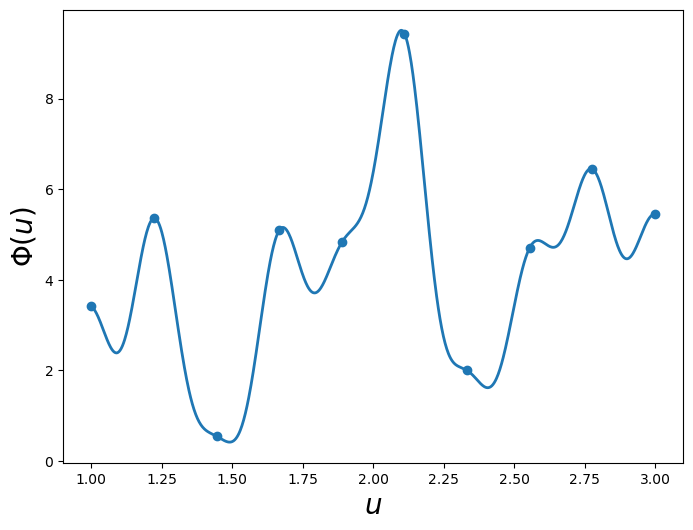

In [70]:
# Test
u = np.array([[1.5]])
y = np.sin(fU(u) * X)

# Compute \Phi(u) = \|y - G_N(u)\|^2
u_plot = np.linspace(1, 3, 1000)
Phi_plot = np.linalg.norm(y - gaussian_process.predict(u_plot.reshape([-1, 1])), axis = 1) ** 2

# Plot 
plt.figure(figsize=(8, 6), dpi = 100)
from matplotlib import pyplot as plt
plt.plot(u_plot, Phi_plot, linewidth = 2.0)
plt.xlabel('$u$', fontsize = 20)
plt.ylabel('$\\Phi(u)$', fontsize = 20)
plt.scatter(U.reshape([-1]), np.linalg.norm(y - Y, axis = 1) ** 2)

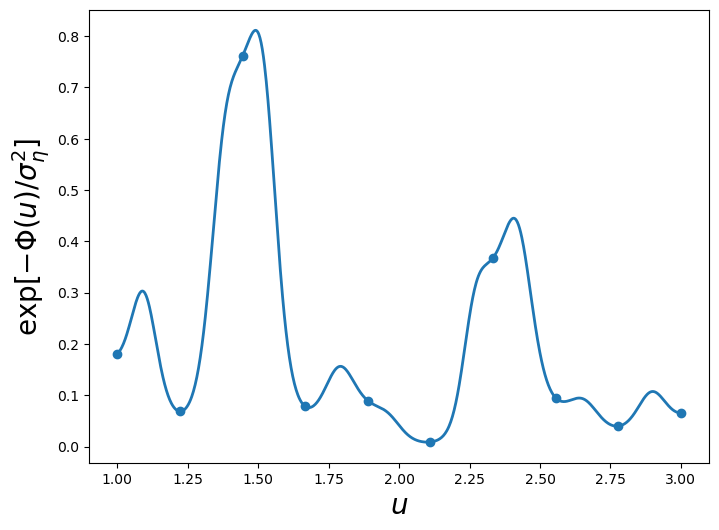

In [72]:
# Plot unnormalized PDF of u
# Set sigma_eta
si_eta = 1.

PDF_plot = np.exp(-Phi_plot / si_eta ** 2 / 2)

plt.figure(figsize=(8, 6), dpi = 100)
from matplotlib import pyplot as plt
plt.plot(u_plot, PDF_plot, linewidth = 2.0)
plt.xlabel('$u$', fontsize = 20)
plt.ylabel('$\exp[-\\Phi(u) / \\sigma_{\\eta}^2]$', fontsize = 20)

PDF_scatter = np.exp(-np.linalg.norm(y - Y, axis = 1) ** 2 / si_eta ** 2 / 2)

plt.scatter(U.reshape([-1]), PDF_scatter)